# Лекция №4. Кластеризация методом k-means.

* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/clustering.html

*Примечание*: главным недостатком метода k-means является требование указать конкретное число кластеров, которое аналитик либо должен выбрать, либо написать алгоритм по определению его оптимального числа.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2. 

In [3]:
# инициализация модели
model = KMeans(n_clusters=2, random_state=42)
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать
# одинаковые результаты.

In [4]:
# подгонка модели по данным из df
model.fit(df)

KMeans(n_clusters=2, random_state=42)

Дополнительные параметры метода fit:
- max_iter - максимальное кол-во итераций передвижений центров кластеров;
- n_clusters - заданное число кластеров;
- n_init - кол-во случайных первичных инициализаций центров кластеров;
- random_state - зерно датчика случайных чисел, При каждом новом вызове с одинаковыми random_state модель будет давать одинаковые результаты;
- tol - точность, меньше которой изменения положений центров кластеров не учитываются;
- verbose=0 - не выводить промежуточные результаты

In [5]:
# Результат кластеризации на данных df
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [6]:
# координаты центров кластеров
model.cluster_centers_

array([[ 9.52380952e-01,  2.38095238e-01,  4.76190476e-02,
        -8.32667268e-17,  7.61904762e-01,  4.28571429e-01,
         4.76190476e-02,  3.80952381e-01],
       [ 1.11022302e-16,  9.23076923e-01,  5.38461538e-01,
         5.38461538e-01, -5.55111512e-17,  1.53846154e-01,
         7.69230769e-01,  7.69230769e-02]])

In [7]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

c:\users\bokoser_user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 0])

Модель выше разбивала на два кластера. 
Как определить число кластеров?
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

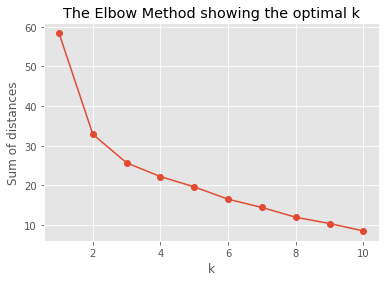

In [8]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Допустим, мы решили, что три кластера -- это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения факторов для каждого кластера.

In [9]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


In [10]:
df.groupby('cluster').size()

cluster
0    11
1    11
2    12
dtype: int64